<a href="https://colab.research.google.com/github/TrKer1121/AI_HomeWork/blob/main/CNN_TRAICAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model

In [2]:
#Liên kết với google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TRAICAY/TRAIN/_train',target_size=(150,150), batch_size=1, class_mode='categorical')
validation_set=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TRAICAY/TRAIN/_vali',target_size=(150,150), batch_size=1, class_mode='categorical')

Found 200 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


In [4]:
training_set.class_indices

{'BUOI': 0, 'CAM': 1, 'COC': 2, 'KHE': 3, 'MIT': 4}

In [5]:
#Tạo Model
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3), activation = 'relu',padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(training_set, epochs = 50, batch_size=120, validation_data = validation_set, verbose=1)

Epoch 1/50
200/200 [==============================] - 125s 567ms/step - loss: 2.9551 - accuracy: 0.5050 - val_loss: 0.3660 - val_accuracy: 0.8600
Epoch 2/50
200/200 [==============================] - 4s 19ms/step - loss: 0.9102 - accuracy: 0.7050 - val_loss: 1.0844 - val_accuracy: 0.7250
Epoch 3/50
200/200 [==============================] - 4s 19ms/step - loss: 0.7011 - accuracy: 0.8150 - val_loss: 0.7485 - val_accuracy: 0.7100
Epoch 4/50
200/200 [==============================] - 4s 19ms/step - loss: 0.4749 - accuracy: 0.8950 - val_loss: 1.0025 - val_accuracy: 0.7600
Epoch 5/50
200/200 [==============================] - 4s 19ms/step - loss: 0.3903 - accuracy: 0.9000 - val_loss: 0.1602 - val_accuracy: 0.9500
Epoch 6/50
200/200 [==============================] - 4s 19ms/step - loss: 0.1608 - accuracy: 0.9550 - val_loss: 0.2669 - val_accuracy: 0.9500
Epoch 7/50
200/200 [==============================] - 4s 19ms/step - loss: 1.7296 - accuracy: 0.6900 - val_loss: 0.3754 - val_accuracy: 0.9

Sai số kiểm tra là:  3.975622462348838e-07
Độ chính xác kiểm tra là:  1.0


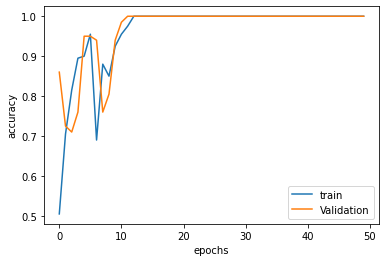

In [8]:
#đánh giá
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [9]:
model.save('model_save/CNN_Fruit.h5')

2
Coc


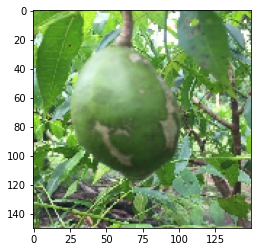

In [12]:
#nhận dạng
CNN_Fruit=load_model('model_save/CNN_Fruit.h5')
img_path = '/content/drive/MyDrive/Colab Notebooks/TRAICAY/TEST/Coc_00102.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
pre=np.argmax(CNN_Fruit.predict(img),axis=1)
pred = model.predict(img)

classes = ['Buoi','Cam', 'Coc', 'Khe', 'Mit']
print(np.argmax(pred))
if pre == 0:
  print(classes[0])
elif pre == 1:
    print(classes[1])
elif pre == 2:
    print(classes[2])
elif pre == 3:
    print(classes[3])
elif pre == 4:
    print(classes[4])
elif pre == 5 : 
  print(classes[5])